# Question 2

We are using "A2_Q2.csv" dataset, which resides in the same folder.

## Part A
We assume *true* is positive target level. Using a score threshold of 0.5 we calculate confusion matrix using `pd.crosstab()`<br>
We import our dataset into pandas dataframe.

In [1]:
import pandas as pd
df = pd.read_csv('A2_Q2.csv')

In [2]:
df.shape

(30, 3)

We now analyse **Target** class for correct and incorrect classifications. We assume correct classification is any **Score >= 0.5**

In [3]:
df[df.Score >= 0.50]['Target'].value_counts()

True     9
False    6
Name: Target, dtype: int64

In [4]:
df[df.Score < 0.50]['Target'].value_counts()

False    11
True      4
Name: Target, dtype: int64

Create copy of our dataframe, rename column **Target** to **Predicted** and display this df

In [5]:
df_new = df.copy()
df_new = df_new.rename(columns={'Target':'Predicted'})
df_new

,ID,Predicted,Score
0,1,False,0.46
1,2,False,0.14
2,3,False,0.48
3,4,True,0.91
4,5,False,0.24
5,6,True,0.79
6,7,False,0.17
7,8,False,0.11
8,9,False,0.54
9,10,True,0.32


We create a new column **Actual** which is **True** for all score thresholds >= 0.5, **False** otherwise

In [6]:
df_new['Actual'] = df_new['Score'] >= 0.50
df_new

,ID,Predicted,Score,Actual
0,1,False,0.46,False
1,2,False,0.14,False
2,3,False,0.48,False
3,4,True,0.91,True
4,5,False,0.24,False
5,6,True,0.79,True
6,7,False,0.17,False
7,8,False,0.11,False
8,9,False,0.54,True
9,10,True,0.32,False


Create confusion matrix for **Actual** vs **Predicted** results

In [7]:
confusion_matrix = pd.crosstab(df_new['Actual'], df_new['Predicted'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,False,True
Actual,,
False,11,4
True,6,9


## Part B
In this part we have to calculate following 5 metrics in *df_metric* dataframe:<br>
- Error Rate
- Precision
- Recall
- F1 Score
- TNR
- FPR

**Error Rate**

In [8]:
error_rate = (confusion_matrix[0][1]+confusion_matrix[1][0])/(confusion_matrix.values.sum())
error_rate

0.3333333333333333

**Precision**

In [9]:
precision = (confusion_matrix[1][1])/ (confusion_matrix[1].values.sum())
precision

0.6923076923076923

**Recall a.k.a TPR**

In [10]:
recall = (confusion_matrix[1][1]) / (confusion_matrix.iloc[1].values.sum())
recall

0.6

**F1 Score**

In [11]:
f1_score = (2 * precision * recall) / (precision + recall)
f1_score

0.6428571428571429

**TNR**

In [12]:
tnr = confusion_matrix[0][0] / (confusion_matrix.iloc[0].values.sum())
tnr

0.7333333333333333

**FPR**

In [13]:
fpr = 1 - tnr
fpr

0.2666666666666667

In [14]:
df_metrics = pd.DataFrame(columns=['Metrics', 'Value'])

In [15]:
df_metrics = df_metrics.append({'Metrics':'Error Rate', 'Value':error_rate.round(3)}, ignore_index=True)
df_metrics = df_metrics.append({'Metrics':'Precision', 'Value':precision.round(3)}, ignore_index=True)
df_metrics = df_metrics.append({'Metrics':'Recall', 'Value':recall.round(3)}, ignore_index=True)
df_metrics = df_metrics.append({'Metrics':'F1 Score', 'Value':f1_score.round(3)}, ignore_index=True)
df_metrics = df_metrics.append({'Metrics':'FPR', 'Value':fpr.round(3)}, ignore_index=True)

In [16]:
df_metrics

,Metrics,Value
0,Error Rate,0.333
1,Precision,0.692
2,Recall,0.600
3,F1 Score,0.643
4,FPR,0.267


# Part C
In this part we are varying the score threshold from 0.1 to 0.9 (both inclusive) with steps of 0.1 and compute **TPR** and **FPR** values

In [17]:
df_roc = pd.DataFrame(columns=['Threshold', 'TPR', 'FPR'])
df_roc

,Threshold,TPR,FPR


We then append the calculated **TPR** and **FPR** values to `df_roc` dataframe.

In [18]:
import numpy as np

df_two = df.copy()
df_two = df_two.rename(columns={'Target':'Predicted'})

# Calculate FPR & TPR at all thresholds from 0.1 to 0.9 (inclusive), with step increment of 0.1
for threshold in np.arange(0.1, 1, 0.1).round(2):
    df_temp = df_two.copy()
    df_temp['Actual'] = df_temp[['Score']] >= threshold
    print("Threshold: ", threshold)
    print("------Confusion Matrix-------")
    confusion_matrix = pd.crosstab(df_temp['Actual'], df_temp['Predicted'], rownames=['Actual'], colnames=['Predicted'])
    print(confusion_matrix, "\n=============================")
    recall = ((confusion_matrix[1][1]) / (confusion_matrix.iloc[1].values.sum())).round(3)
    tnr = confusion_matrix[0][0] / (confusion_matrix.iloc[0].values.sum())
    fpr = (1 - tnr).round(3)
    df_roc = df_roc.append({'Threshold':threshold, 'TPR':recall, 'FPR':fpr}, ignore_index=True)

Threshold:  0.1
------Confusion Matrix-------
Predicted  False  True 
Actual                 
False          1      0
True          16     13 
Threshold:  0.2
------Confusion Matrix-------
Predicted  False  True 
Actual                 
False          5      0
True          12     13 
Threshold:  0.3
------Confusion Matrix-------
Predicted  False  True 
Actual                 
False          7      1
True          10     12 
Threshold:  0.4
------Confusion Matrix-------
Predicted  False  True 
Actual                 
False          9      2
True           8     11 
Threshold:  0.5
------Confusion Matrix-------
Predicted  False  True 
Actual                 
False         11      4
True           6      9 
Threshold:  0.6
------Confusion Matrix-------
Predicted  False  True 
Actual                 
False         13      5
True           4      8 
Threshold:  0.7
------Confusion Matrix-------
Predicted  False  True 
Actual                 
False         15      7
True           2      6 

Here is what `df_roc` dataframe looks like

In [19]:
df_roc

,Threshold,TPR,FPR
0,0.1,0.448,0.000
1,0.2,0.520,0.000
2,0.3,0.545,0.125
3,0.4,0.579,0.182
4,0.5,0.600,0.267
5,0.6,0.667,0.278
6,0.7,0.750,0.318
7,0.8,0.800,0.360
8,0.9,1.000,0.414


## Part D

Using the above `df_roc`, we now display an **ROC Curve** with appropriate axes labels and a title.

In [20]:
#!pip install vega vega_datasets
#!pip install --upgrade altair

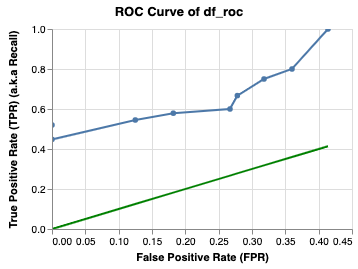

In [21]:
# Code referenced from https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-4-model-evaluation/
# !pip install vega vega_datasets
# !pip install --upgrade altair
# use alt.renderers.enable('html') if running locally

import altair as alt
alt.renderers.enable('notebook')

base = alt.Chart(df_roc, 
                 title='ROC Curve of df_roc'
                ).properties(width=300)

roc_curve = base.mark_line(point=True).encode(
    alt.X('FPR', title='False Positive Rate (FPR)',  sort=None),
    alt.Y('TPR', title='True Positive Rate (TPR) (a.k.a Recall)'),
)

roc_rule = base.mark_line(color='green').encode(
    x='FPR',
    y='FPR',
    size=alt.value(2)
)

(roc_curve + roc_rule).interactive()

Above is the **ROC Curve** for our dataset at all thresholds from 0.1 to 0.9 (both inclusive) at step interval of 0.1

## Question 2 wrap-up

In [22]:
df_metrics

,Metrics,Value
0,Error Rate,0.333
1,Precision,0.692
2,Recall,0.600
3,F1 Score,0.643
4,FPR,0.267


In [23]:
df_roc

,Threshold,TPR,FPR
0,0.1,0.448,0.000
1,0.2,0.520,0.000
2,0.3,0.545,0.125
3,0.4,0.579,0.182
4,0.5,0.600,0.267
5,0.6,0.667,0.278
6,0.7,0.750,0.318
7,0.8,0.800,0.360
8,0.9,1.000,0.414
